<a href="https://colab.research.google.com/github/furewing/dataAnalysis/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_02_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC_Pandas_%EB%B0%B0%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas
교재: 데이터 과학을 위한 파이썬 머신러닝(Chapter4)

- <a href="#04.1판다스란">04.1 판다스란</a>
- <a href="#04.2데이터추출">04.2 데이터 추출</a>
- <a href="#04.3그룹별집계">04.3 그룹별 집계</a>
- <a href="#04.4병합과연결">04.4 병합과 연결</a>

---------------

### 라이브러리 설치

In [ ]:
!pip show pandas

Name: pandas
Version: 2.2.1
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
pd.__version__

'2.2.1'

------------------------------

## <a name="04.1판다스란">04.1 판다스란</a>

### 1. 판다스의 개념
- https://pandas.pydata.org/
- 파이썬의 데이터 분석 라이브러리
- 데이터 테이블(data table)을 다루는 도구
- 넘파이를 사용, 판다스는 넘파이를 효율적으로 사용하기 위해 인덱싱, 연산, 전처리 등 다양한 함수 제공
- **데이터프레임(DataFrame)** : 데이터 테이블 전체 객체
- **시리즈(Series)** : 각 열 데이터를 다루는 객체
- 10 minutes to pandas : https://pandas.pydata.org/docs/user_guide/10min.html

### 2. 시리즈 객체
- 피쳐 벡터(feature vector)와 같은 개념
- 데이터프레임(DataFrame) 안에 포함된 열(colume)들을 지칭할 수 있음
- list, dict, ndarray 등 다양한 데이터 타입이 시리즈 객체 형태로 변환되기도 함

### [예제] Series 객체

In [ ]:
# from pandas import Series
import pandas as pd

data = pd.Series([1,2,3,4,5])
print(type(data))
print(f'인덱스: {data.index}')
print(f'value: {data.values}')
data


<class 'pandas.core.series.Series'>
인덱스: RangeIndex(start=0, stop=5, step=1)
value: [1 2 3 4 5]


0    1
1    2
2    3
3    4
4    5
dtype: int64

### Series 객체 생성
- 판다스의 모든 객체는 인덱스 값을 기준으로 생성

In [ ]:
# 딕셔너리는 키를 인덱스로 사용한다.
dict_data = {"a":1, "b":2, "c":3, "d":4, "e":5}
data = pd.Series(dict_data, index=dict_data.keys()) # index의 값을 딕셔너리의 keys()값으로 변경할 수 있다(딕셔너리는 순서가 없는 자료여서...순서가 뒤섞일 수 있는 가능성이 있음)
data = pd.Series(dict_data)     # 위와 동일한 결과
print(data.index)   # Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
data


Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# 시리즈 객체간 연산이 가능하다
data1 = pd.Series({'국어':100, '영어':90, '수학':80, '과학':100})
data2 = pd.Series({'국어':90, '영어':100, '수학':70, '과학':80})
data2 - data1


국어   -10
영어    10
수학   -10
과학   -20
dtype: int64

In [ ]:
# 데이터(element:요소) 추가/삭제가 가능하다
data1['체육'] = 100
del data1['영어']
data1

KeyError: '영어'

In [ ]:
#date_range 옵션 보기
# https://pandas.pydata.org/docs/reference/api/pandas.date_range.html#
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

import numpy as np

dates = pd.date_range("20240101", periods=6)    #default freq='D'
dates = pd.date_range("20240101", periods=6, freq='ME')    #freq='ME' => Month END
dates = pd.date_range("2024", periods=6, freq='YS')
print(type(dates))
dates
#df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
#df

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


DatetimeIndex(['2024-01-01', '2025-01-01', '2026-01-01', '2027-01-01',
               '2028-01-01', '2029-01-01'],
              dtype='datetime64[ns]', freq='YS-JAN')

In [ ]:
import pandas as pd

# period_range
# https://pandas.pydata.org/docs/reference/api/pandas.period_range.html

dates = pd.period_range(start='2014', end='2024', freq='Y')
dates

PeriodIndex(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
             '2022', '2023', '2024'],
            dtype='period[Y-DEC]')

------------------

### 3. 데이터프레임 객체
- 데이터 테이블 전체를 지칭하는 객체
- 넘파이 배열의 특성을 그대로 가짐
- 인덱싱 : 열과 행 각각 사용하여 하나의 데이터에 접근

### [예제] Pandas로 다양한 파일 읽어오기

#### 1.txt 데이터 Pandas DataFrame으로 나타내기

In [ ]:
import pandas as pd

DIR = './data/'
# Text 파일 읽어오기(read_table)
df = pd.read_table(f'{DIR}book.txt',
                   sep=',',
                   names=['제목', '영어제목', '저자', '언어', '출판년도'])
df


,제목,영어제목,저자,언어,출판년도
0,두 도시 이야기,A Tale of Two Cities,찰스 디킨스,영어,1859
1,어린 왕자,Le Petit Prince,앙투안 드 생텍쥐페리,프랑스어,1943
2,반지의 제왕,The Lord of the Rings,J. R. R. 톨킨,영어,1954 ~ 1955
3,그리고 아무도 없었다,And Then There Were None,애거사 크리스티,영어,1939
4,호빗,The Hobbit,J. R. R. 톨킨,영어,1937


#### 2.csv 데이터 Pandas DataFrame으로 나타내기

In [ ]:
filename = './data/인구밀도.csv'    # 한글 깨짐현상 encoding='cp949' -> 오류 나면  utf-8로 encoding
df = pd.read_csv(filename, encoding='cp949')
df

,행정구역별,2020,2021,2022
0,전국,516.2,515.2,514.6
1,서울특별시,15839.0,15650.1,15560.7
2,부산광역시,4348.9,4316.4,4272.8
3,대구광역시,2728.6,2702.2,2673.7
4,인천광역시,2765.1,2772.8,2801.3
5,광주광역시,2948.5,2944.0,2931.9
6,대전광역시,2758.1,2742.8,2730.7
7,울산광역시,1069.0,1055.0,1044.9
8,세종특별자치시,761.3,787.7,822.9
9,경기도,1325.3,1338.9,1344.9


#### 3.Excel 시트 Pandas DataFrame으로 나타내기

In [ ]:
!pip install openpyxl

##### 1.전체 시트(sheet) 가져오기

In [ ]:
import pandas as pd

# 전체 시트 가져오기
# 시트가 여러개 일 경우 딕셔너리 형태로 나타난다.
filename = './data/인구밀도_excel.xlsx'
#df = pd.read_excel(filename)    #옵션을 안줄때는 첫번째 시트가 출력
df = pd.read_excel(filename, sheet_name=None)    #전체 시트(딕셔너리형태)
#df = pd.read_excel(filename, sheet_name='인구밀도2')    #특정 시트 지정 출력
df

{'인구밀도':       행정구역별     2020     2021     2022
 0        전국    516.2    515.2    514.6
 1     서울특별시  15839.0  15650.1  15560.7
 2     부산광역시   4348.9   4316.4   4272.8
 3     대구광역시   2728.6   2702.2   2673.7
 4     인천광역시   2765.1   2772.8   2801.3
 5     광주광역시   2948.5   2944.0   2931.9
 6     대전광역시   2758.1   2742.8   2730.7
 7     울산광역시   1069.0   1055.0   1044.9
 8   세종특별자치시    761.3    787.7    822.9
 9       경기도   1325.3   1338.9   1344.9
 10      강원도     90.4     90.4     90.8
 11     충청북도    220.3    219.4    219.4
 12     충청남도    264.0    263.8    265.9
 13     전라북도    223.4    221.4    219.8
 14     전라남도    144.9    143.9    143.3
 15     경상북도    138.9    138.4    137.7
 16     경상남도    316.2    313.6    311.2
 17  제주특별자치도    362.6    363.8    365.6,
 '인구밀도2':       행정구역별     2001     2002     2003
 0        전국    516.2    515.2    514.6
 1     서울특별시  15839.0  15650.1  15560.7
 2     부산광역시   4348.9   4316.4   4272.8
 3     대구광역시   2728.6   2702.2   2673.7
 4     인천광역시   2765.1 

##### 2.특정 시트(sheet) 가져오기

In [ ]:
# 특정 시트 가져오기
import pandas as pd

# 특정 시트 가져오기
filename = './data/인구밀도_excel.xlsx'
df = pd.read_excel(filename, sheet_name='인구밀도2')    #특정 시트 지정 출력
df

,행정구역별,2001,2002,2003
0,전국,516.2,515.2,514.6
1,서울특별시,15839.0,15650.1,15560.7
2,부산광역시,4348.9,4316.4,4272.8
3,대구광역시,2728.6,2702.2,2673.7
4,인천광역시,2765.1,2772.8,2801.3
5,광주광역시,2948.5,2944.0,2931.9
6,대전광역시,2758.1,2742.8,2730.7
7,울산광역시,1069.0,1055.0,1044.9
8,세종특별자치시,761.3,787.7,822.9
9,경기도,1325.3,1338.9,1344.9


##### 3.여러 시트(sheet) 가져오기

In [ ]:
# 여러 시트 가져오기: 시트 이름으로 가져오기
filename = './data/인구밀도_excel.xlsx'
df = pd.read_excel(filename, sheet_name=['인구밀도','인구밀도2'])    #특정 시트 지정 출력
df

{'인구밀도':       행정구역별     2020     2021     2022
 0        전국    516.2    515.2    514.6
 1     서울특별시  15839.0  15650.1  15560.7
 2     부산광역시   4348.9   4316.4   4272.8
 3     대구광역시   2728.6   2702.2   2673.7
 4     인천광역시   2765.1   2772.8   2801.3
 5     광주광역시   2948.5   2944.0   2931.9
 6     대전광역시   2758.1   2742.8   2730.7
 7     울산광역시   1069.0   1055.0   1044.9
 8   세종특별자치시    761.3    787.7    822.9
 9       경기도   1325.3   1338.9   1344.9
 10      강원도     90.4     90.4     90.8
 11     충청북도    220.3    219.4    219.4
 12     충청남도    264.0    263.8    265.9
 13     전라북도    223.4    221.4    219.8
 14     전라남도    144.9    143.9    143.3
 15     경상북도    138.9    138.4    137.7
 16     경상남도    316.2    313.6    311.2
 17  제주특별자치도    362.6    363.8    365.6,
 '인구밀도2':       행정구역별     2001     2002     2003
 0        전국    516.2    515.2    514.6
 1     서울특별시  15839.0  15650.1  15560.7
 2     부산광역시   4348.9   4316.4   4272.8
 3     대구광역시   2728.6   2702.2   2673.7
 4     인천광역시   2765.1 

In [ ]:
# 여러 시트 가져오기: 시트 번호로 가져오기 (0번부터 시작)
filename = './data/인구밀도_excel.xlsx'
df = pd.read_excel(filename, sheet_name=[0,1])    #특정 시트 지정 출력
df = pd.read_excel(filename, sheet_name=['인구밀도',1])    #특정 시트 지정 출력
df

#df.to_excel(filename)  #파일 저장

{'인구밀도':       행정구역별     2020     2021     2022
 0        전국    516.2    515.2    514.6
 1     서울특별시  15839.0  15650.1  15560.7
 2     부산광역시   4348.9   4316.4   4272.8
 3     대구광역시   2728.6   2702.2   2673.7
 4     인천광역시   2765.1   2772.8   2801.3
 5     광주광역시   2948.5   2944.0   2931.9
 6     대전광역시   2758.1   2742.8   2730.7
 7     울산광역시   1069.0   1055.0   1044.9
 8   세종특별자치시    761.3    787.7    822.9
 9       경기도   1325.3   1338.9   1344.9
 10      강원도     90.4     90.4     90.8
 11     충청북도    220.3    219.4    219.4
 12     충청남도    264.0    263.8    265.9
 13     전라북도    223.4    221.4    219.8
 14     전라남도    144.9    143.9    143.3
 15     경상북도    138.9    138.4    137.7
 16     경상남도    316.2    313.6    311.2
 17  제주특별자치도    362.6    363.8    365.6,
 1:       행정구역별     2001     2002     2003
 0        전국    516.2    515.2    514.6
 1     서울특별시  15839.0  15650.1  15560.7
 2     부산광역시   4348.9   4316.4   4272.8
 3     대구광역시   2728.6   2702.2   2673.7
 4     인천광역시   2765.1   2772

#### 4.Remote URL의 CSV 데이터 Pandas DataFrame으로 나타내기

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(url, header=None)
df = pd.read_csv(url, names=
                 ['컬럼1', '컬럼2', '컬럼3', '컬럼4'])
df.head(-2)
df.tail()
df

,컬럼1,컬럼2,컬럼3,컬럼4
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...
6.7,3.0,5.2,2.3,Iris-virginica
6.3,2.5,5.0,1.9,Iris-virginica
6.5,3.0,5.2,2.0,Iris-virginica
6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

iris

df = pd.DataFrame(iris['data'], #->iris.data도 가능
                  columns=iris['feature_names'])
print(f"target : {iris['target']}")
print(f"target_names : {iris['target_names']}")
df['result'] = iris['target']   #result 컬럼을 하나 추가(값은 iris['target'])
df['result_names'] = iris.target_names[iris.target]   #result_names 컬럼을 하나 추가(값은 iris['target_names'])
df['result_names'] = iris['target_names'][iris['target']]   #result_names 컬럼을 하나 추가(값은 iris['target_names'])
df



target : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
target_names : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),result,result_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## [실습문제] 통계청 인구정보 가져오기

In [22]:
import pandas as pd

# https://kosis.kr/statisticsList/statisticsListIndex.do?parentId=A.1&vwcd=MT_ZTITLE&menuId=M_01_01&outLink=Y&entrType=#content-group
df = pd.read_csv('./인구밀도_인구주택총조사기준__20240418110707.csv', encoding='cp949')
df
df['행정구역별'] # 컬럼 한 개 : 시리즈 객체
df.head(10) #앞에서부터 10개 보기
df.tail(10) #뒤에서부터 10개 보기
df.iloc[2:5, :] #iloc[행,열] -> 인덱스로 접근(ex>2행부터4행까지 전체 컬럼)
df.loc[[2,3], ['2021','2022']]  #loc[행, 열] -> 이름으로 접근, 여러개는 리스트로 담아서 접근




,2021,2022
2,4316.4,4272.8
3,2702.2,2673.7


### 1. 데이터프레임 생성
- 2차원 리스트 타입으로 만들기
- 딕셔너리 타입으로 만들기 :  키(key)는 열 이름, 값(value)은 시퀀스형 데이터 타입을 넣어 각 열의 데이터로 만듦


In [ ]:
# 2차원 리스트 타입으로 DataFrame 만들기
raw_data = [['Jason','Miller', 42, 'San Francisco'],
            ['Molly', 'Jacobson', 52, 'Baltimore'],
            ['Tina', 'Ali', 36, 'Miami'],
            ['Jake', 'Milner', 24, 'Douglas'],
            ['Amy', 'Cooze', 77, 'Boston']]

#방법1
df = pd.DataFrame(raw_data, columns=['first_name', 'last_name', 'age', 'address'])
#방법2
df = pd.DataFrame(raw_data)
df.columns = ['first_name', 'last_name', 'age', 'address']
df


,first_name,last_name,age,address
0,Jason,Miller,42,San Francisco
1,Molly,Jacobson,52,Baltimore
2,Tina,Ali,36,Miami
3,Jake,Milner,24,Douglas
4,Amy,Cooze,77,Boston


In [ ]:
# 딕셔너리 타입으로 DataFrame 만들기
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
            'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'],
            'age': [42, 52, 36, 24, 73],
            'city': ['San Francisco', 'Baltimore', 'Miami', 'Douglas', 'Boston']}
df = pd.DataFrame(raw_data)
df

,first_name,last_name,age,city
0,Jason,Miller,42,San Francisco
1,Molly,Jacobson,52,Baltimore
2,Tina,Ali,36,Miami
3,Jake,Milner,24,Douglas
4,Amy,Cooze,73,Boston


### 2. 데이터프레임의 열 다루기

In [ ]:
# 데이터 생성시, 딕셔너리 데이터에서 열(Key) 이름을 한정하면 해당 열만 추출
df = pd.DataFrame(raw_data, columns=['first_name', 'age'])
df


,first_name,age
0,Jason,42
1,Molly,52
2,Tina,36
3,Jake,24
4,Amy,73


In [ ]:
# 데이터가 존재하지 않는 열을 추가하면 해당 열에는 NaN 값들 추가
df = pd.DataFrame(raw_data, columns=['first_name', 'age', 'last_name', 'city', 'hp'])
df

,first_name,age,last_name,city,hp
0,Jason,42,Miller,San Francisco,NaN
1,Molly,52,Jacobson,Baltimore,NaN
2,Tina,36,Ali,Miami,NaN
3,Jake,24,Milner,Douglas,NaN
4,Amy,73,Cooze,Boston,NaN


-----------------

## <a name="04.2데이터추출">04.2 데이터 추출</a>

### 1. 데이터 로딩

In [ ]:
filename = './data/excel-comp-data.xlsx'
df = pd.read_excel(filename)
df.head()

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000


### 2. 열 이름을 사용한 데이터 추출

In [ ]:
# 열 이름을 리스트 형태로 넣어 호출
df['account']   # 하나의 필드만 볼 때는 [] 생략해도 오류 나지 않음
#df['account', 'name', 'city']   # 오류
df[['account', 'name', 'city']]   # 여러개 볼 때는 [[]] 이렇게
df[['account', 'name', 'city']].head()


,account,name,city
0,211829,"Kerluke, Koepp and Hilpert",New Jaycob
1,320563,Walter-Trantow,Port Khadijah
2,648336,"Bashirian, Kunde and Price",New Lilianland
3,109996,"D'Amore, Gleichner and Bode",Hyattburgh
4,121213,Bauch-Goldner,Shanahanchester


### 3. 행 번호를 사용한 데이터 추출

In [ ]:
# 인덱스 번호로 호출
df[:3]  # 처음부터 3까지의 행 출력

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000


### 4. 행과 열을 모두 사용한 데이터 추출

In [ ]:
# 열 이름, 인덱스 번호 둘 다 사용해서 호출
df[['account', 'name', 'city']][:3]



,account,name,city
0,211829,"Kerluke, Koepp and Hilpert",New Jaycob
1,320563,Walter-Trantow,Port Khadijah
2,648336,"Bashirian, Kunde and Price",New Lilianland


In [ ]:
# 인덱스 변경하기
df.index = df['account']
del df['account']
df

,name,street,city,state,postal-code,Jan,Feb,Mar
account,,,,,,,,
211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000
205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461,145000,95000,35000
209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415,70000,95000,35000


In [ ]:
# loc 함수 : 인덱스 이름과 열 이름으로 데이터 추출
df.loc[:648336, ['name','city']]

,name,city
account,,
211829,"Kerluke, Koepp and Hilpert",New Jaycob
320563,Walter-Trantow,Port Khadijah
648336,"Bashirian, Kunde and Price",New Lilianland


In [ ]:
# iloc 함수 :  인덱스 번호로만 데이터 호출
df.iloc[2:4, 2:4]

,city,state
account,,
648336,New Lilianland,Iowa
109996,Hyattburgh,Maine


### 5.새로운 인덱스 할당

In [ ]:
# reset_index 함수로 새로운 인덱스 할당된 객체 생성
df_new = df.reset_index()
df_new.head(3)

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000


### 6. drop 함수

In [ ]:
# drop 함수 : 특정 열이나 행을 삭제한 객체를 반환
#컬럼삭제(axis=1)
#df_new.drop('street', axis=1, inplace=True)    #axis=축, 자기 자신의 삭제된 것을 바로 실행해서 적용하려면 inplace 를 사용해야한다.
#df_new.drop('street', axis=1, inplace=True)    #axis=축, 한개 컬럼 삭제시 사용, 자기 자신의 삭제된 것을 바로 실행해서 적용하려면 inplace 를 사용해야한다.(inplace=True:진짜로 삭제할때)
df_new.drop(['city', 'state'], axis=1, inplace=True)    #axis=축, 여러개 컬럼 삭세시 사용, 자기 자신의 삭제된 것을 바로 실행해서 적용하려면 inplace 를 사용해야한다.
df_new

,account,name,street,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,49681,162000,120000,35000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,62785,150000,120000,35000
6,145068,Casper LLC,340 Consuela Bridge Apt. 400,18008,62000,120000,70000
7,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,53461,145000,95000,35000
8,209744,Champlin-Morar,26739 Grant Lock,64415,70000,95000,35000
9,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,46308,70000,120000,35000


In [ ]:
#행삭제(axis=0, default)
#df_new.drop(4, inplace=True)
#df_new.drop(0, axis=0, inplace=True)
df_new.drop([2,5,6], axis=0, inplace=True)
df_new

,account,name,street,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,38365,95000,45000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,49681,162000,120000,35000
7,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,53461,145000,95000,35000
8,209744,Champlin-Morar,26739 Grant Lock,64415,70000,95000,35000
9,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,46308,70000,120000,35000
10,214098,"Goodwin, Homenick and Jerde",649 Cierra Forks Apt. 078,47743,45000,120000,55000
11,231907,Hahn-Moore,18115 Olivine Throughway,31415,150000,10000,162000
12,242368,"Frami, Anderson and Donnelly",182 Bertie Road,72686,162000,120000,35000


------------------------

## <a name="04.3그룹별집계">04.3 그룹별 집계</a>

### 1. 그룹별 집계의 개념
- 그룹별 집계(groupby) : 데이터로부터 동일한 객체를 가진 데이터만 따로 뽑아 기술통계 데이터를 추출
- 엑셀의 피봇테이블(pivot table) 기능과 비슷
- groupby 명령어는 분할→적용→결합 과정을 거침
 - - 분할(split) : 같은 종류의 데이터끼리 나누는 기능 <br>
 - - 적용(apply) : 데이터 블록마다 sum, count, mean 등 연산 적용
 - - 결합(combine) : 연산 함수가 적용된 각 블록들을 합침

### 2. 그룹별 집계 사용하기

In [53]:
# 그룹별 집계의 기본형
data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings','kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
            'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
            'Year': [2014, 2015, 2014, 2015, 2014, 2015, 2016, 2017, 2016, 2014, 2015, 2017],
            'Points': [876,789,863,673,741,812,756,788,694,701,804,690]}

df = pd.DataFrame(data)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [54]:
# 그룹별 집계의 기본형
# Team별 그룹하여 Points의 합계 구하기
df.groupby('Team')['Points'].sum()


Team
Devils    1536
Kings     2285
Riders    3049
Royals    1505
kings      812
Name: Points, dtype: int64

In [56]:
# 멀티 인덱스 그룹별 집계
# - 한 개 이상의 열을 기준으로 그룹별 집계를 실행
df_group = df.groupby(['Team','Year'])['Points'].sum()
df_group

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
kings   2015    812
Name: Points, dtype: int64

In [ ]:
# DataFrame을 파일로 저장하기
df_group.to_csv('팀별그룹핑.csv')

In [ ]:
df_tmp = pd.read_csv('팀별그룹핑.csv')
df_tmp

,Team,Year,Points
0,Devils,2014,863
1,Devils,2015,673
2,Kings,2014,741
3,Kings,2016,756
4,Kings,2017,788
5,Riders,2014,876
6,Riders,2015,789
7,Riders,2016,694
8,Riders,2017,690
9,Royals,2014,701


In [57]:
# 멀티 인덱스
# - 한 개 이상의 열로 그룹별 집계 수행하면 여러 열이 모두 인덱스로 반환됨
df_group = df.groupby(['Team','Year'])['Points'].sum()
df_group.index


MultiIndex([('Devils', 2014),
            ('Devils', 2015),
            ( 'Kings', 2014),
            ( 'Kings', 2016),
            ( 'Kings', 2017),
            ('Riders', 2014),
            ('Riders', 2015),
            ('Riders', 2016),
            ('Riders', 2017),
            ('Royals', 2014),
            ('Royals', 2015),
            ( 'kings', 2015)],
           names=['Team', 'Year'])

In [58]:
# - swaplevel 함수로 인덱스 간 레벨을 변경
# - sort_index 함수로 첫 번째 인덱스를 기준으로 데이터 재정렬
df_group.swaplevel().sort_index()

Year  Team  
2014  Devils    863
      Kings     741
      Riders    876
      Royals    701
2015  Devils    673
      Riders    789
      Royals    804
      kings     812
2016  Kings     756
      Riders    694
2017  Kings     788
      Riders    690
Name: Points, dtype: int64

### 3. 그룹화된 상태
- 그룹화된(grouped) 상태 : 분할→적용→결합 중에서 분할까지만 이루어진 상태
- get_group 함수 : 해당 키 값을 기준으로 분할된 데이터프레임 객체를 확인

In [59]:
a = df.groupby('Team')
a['Points'].sum()

Team
Devils    1536
Kings     2285
Riders    3049
Royals    1505
kings      812
Name: Points, dtype: int64

- **집계(aggregation)** : 요약된 통계 정보를 추출

In [60]:
# 집계(aggregation) : 요약된 통계 정보를 추출
df.groupby('Team').aggregate(min)

,Rank,Year,Points
Team,,,
Devils,2,2014,673
Kings,1,2014,741
Riders,1,2014,690
Royals,1,2014,701
kings,4,2015,812


In [ ]:
# 집계(aggregation) : 요약된 통계 정보를 추출
df.groupby('Team').agg(min)

C:\Users\501-12\AppData\Local\Temp\ipykernel_9428\58036681.py:2: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby('Team').agg(min)


,Rank,Year,Points
Team,,,
Devils,2,2014,673
Kings,1,2014,741
Riders,1,2014,690
Royals,1,2014,701
kings,4,2015,812


In [62]:
df.groupby('Team')['Points'].agg(['sum', 'max'])
df.groupby('Team')['Points'].agg([sum, max])
df.groupby('Team')['Points'].agg(**{'합계':'sum', '최고':'max'})  #컬럼이름 지정
df.groupby('Team')['Points'].agg(**{'합계':sum, '최고':max})     #컬럼이름 지정


,합계,최고
Team,,
Devils,1536,863
Kings,2285,788
Riders,3049,876
Royals,1505,804
kings,812,812


- **필터(filter)** : 특정 조건으로 데이터를 검색

In [66]:
# 필터
# Team별 레코드 개수 3개 이상인 Team
df.groupby('Team').filter(lambda x: len(x) >= 3)
# Team별 Points의 최고값이 800이상인 Team
df.groupby('Team').filter(lambda x: x['Points'].max() >= 800)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
5,kings,4,2015,812
8,Riders,2,2016,694
9,Royals,4,2014,701
10,Royals,1,2015,804
11,Riders,2,2017,690


In [ ]:
#머신러닝 라이브러리
!pip install scikit-learn

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

iris

df = pd.DataFrame(iris['data'], #->iris.data도 가능
                  columns=iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


-----------------

## <a name="04.4병합과연결">04.4 병합과 연결</a>

### 1. 병합
병합(merge) : 두 개의 데이터를 특정 기준한 기준을 가지고 하나로 통합하는 작업

In [67]:
raw_data = {'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
            'test_score': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

df_left = pd.DataFrame(raw_data)
df_left

,subject_id,test_score
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [69]:
raw_data = {'subject_id': ['4', '5', '6', '7', '8'],
            'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
            'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_right = pd.DataFrame(raw_data)
df_right


,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [70]:
# 내부 조인: 양쪽의 교집합 데이터를 통합
pd.merge(left=df_left, right=df_right, on='subject_id', how='inner')

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


In [73]:
# 왼쪽 조인
pd.merge(df_left, df_right, on='subject_id', how='left')
# 오른쪽 조인
pd.merge(df_left, df_right, on='subject_id', how='right')


,subject_id,test_score,first_name,last_name
0,4,61.0,Billy,Bonder
1,5,16.0,Brian,Black
2,6,NaN,Bran,Balwner
3,7,14.0,Bryce,Brice
4,8,15.0,Betty,Btisan


In [74]:
# 완전 조인
pd.merge(left=df_left, right=df_right, on='subject_id', how='outer')

,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,2,15.0,NaN,NaN
2,3,15.0,NaN,NaN
3,4,61.0,Billy,Bonder
4,5,16.0,Brian,Black
5,7,14.0,Bryce,Brice
6,8,15.0,Betty,Btisan
7,9,1.0,NaN,NaN
8,10,61.0,NaN,NaN
9,11,16.0,NaN,NaN


### 2. 연결(concatenate)

In [81]:
# 파일 병합하기(붙이기)
pd.concat([df_left, df_right], join='inner')
pd.concat([df_left, df_right])
pd.concat([df_right,df_left])

#df_left + df_right


,subject_id,first_name,last_name,test_score
0,4,Billy,Bonder,NaN
1,5,Brian,Black,NaN
2,6,Bran,Balwner,NaN
3,7,Bryce,Brice,NaN
4,8,Betty,Btisan,NaN
0,1,NaN,NaN,51.0
1,2,NaN,NaN,15.0
2,3,NaN,NaN,15.0
3,4,NaN,NaN,61.0
4,5,NaN,NaN,16.0


In [82]:
import pandas as pd

# https://kosis.kr/statisticsList/statisticsListIndex.do?parentId=A.1&vwcd=MT_ZTITLE&menuId=M_01_01&outLink=Y&entrType=#content-group
df = pd.read_csv('./인구밀도_인구주택총조사기준__20240418110707.csv', encoding='cp949')
df




,행정구역별,2020,2021,2022
0,전국,516.2,515.2,514.6
1,서울특별시,15839.0,15650.1,15560.7
2,부산광역시,4348.9,4316.4,4272.8
3,대구광역시,2728.6,2702.2,2673.7
4,인천광역시,2765.1,2772.8,2801.3
5,광주광역시,2948.5,2944.0,2931.9
6,대전광역시,2758.1,2742.8,2730.7
7,울산광역시,1069.0,1055.0,1044.9
8,세종특별자치시,761.3,787.7,822.9
9,경기도,1325.3,1338.9,1344.9


<Axes: >

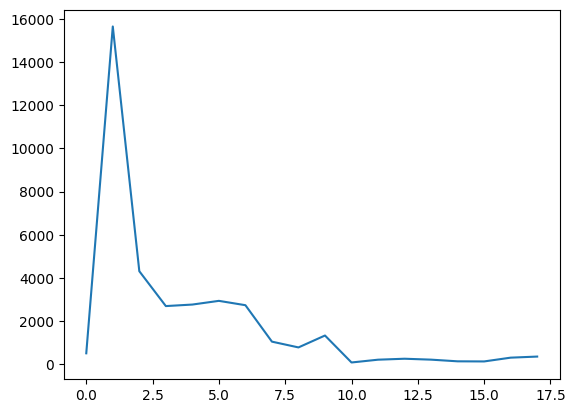

In [83]:
df['2021'].plot()

In [34]:
df.query("행정구역별 in ('서울특별시','경기도') and `2021` > 10000")  # 컬럼이 숫자라 인식을 못 할때는 `를 쓴다


,행정구역별,2020,2021,2022
1,서울특별시,15839.0,15650.1,15560.7


In [36]:
#pandas/DataFrame에서 유용하게 사용하는 함수
df.info()   #데이터의 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역별   18 non-null     object 
 1   2020    18 non-null     float64
 2   2021    18 non-null     float64
 3   2022    18 non-null     float64
dtypes: float64(3), object(1)
memory usage: 704.0+ bytes


In [39]:
df.describe()    #데이터의 기술통계 정보

,2020,2021,2022
count,18.000000,18.000000,18.000000
mean,2045.594444,2032.211111,2025.116667
std,3678.648378,3635.094546,3612.959623
min,90.400000,90.400000,90.800000
25%,233.550000,232.000000,231.325000
50%,638.750000,651.450000,668.750000
75%,2750.725000,2732.650000,2716.450000
max,15839.000000,15650.100000,15560.700000


In [45]:
df.index = df['행정구역별']
del df['행정구역별']    #컬럼 삭제
df.drop('행정구역별',asix=1, inplace=True)


,2020,2021,2022
행정구역별,,,
서울특별시,15839.0,15650.1,15560.7
부산광역시,4348.9,4316.4,4272.8
대구광역시,2728.6,2702.2,2673.7
인천광역시,2765.1,2772.8,2801.3
광주광역시,2948.5,2944.0,2931.9
대전광역시,2758.1,2742.8,2730.7
울산광역시,1069.0,1055.0,1044.9
세종특별자치시,761.3,787.7,822.9
경기도,1325.3,1338.9,1344.9


In [ ]:
df.drop('전국',axis=0, inplace=True)   #전국 행 삭제
df

In [48]:
# 행 --> 열 바꾸기
df_t = df.T
df_t

,2020,2021,2022
행정구역별,,,
강원도,90.4,90.4,90.8
경기도,1325.3,1338.9,1344.9
경상남도,316.2,313.6,311.2
경상북도,138.9,138.4,137.7
광주광역시,2948.5,2944.0,2931.9
대구광역시,2728.6,2702.2,2673.7
대전광역시,2758.1,2742.8,2730.7
부산광역시,4348.9,4316.4,4272.8
서울특별시,15839.0,15650.1,15560.7


행정구역별,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2020,15839.0,4348.9,2728.6,2765.1,2948.5,2758.1,1069.0,761.3,1325.3,90.4,220.3,264.0,223.4,144.9,138.9,316.2,362.6
2021,15650.1,4316.4,2702.2,2772.8,2944.0,2742.8,1055.0,787.7,1338.9,90.4,219.4,263.8,221.4,143.9,138.4,313.6,363.8
2022,15560.7,4272.8,2673.7,2801.3,2931.9,2730.7,1044.9,822.9,1344.9,90.8,219.4,265.9,219.8,143.3,137.7,311.2,365.6


--------------